In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import blur_detector

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


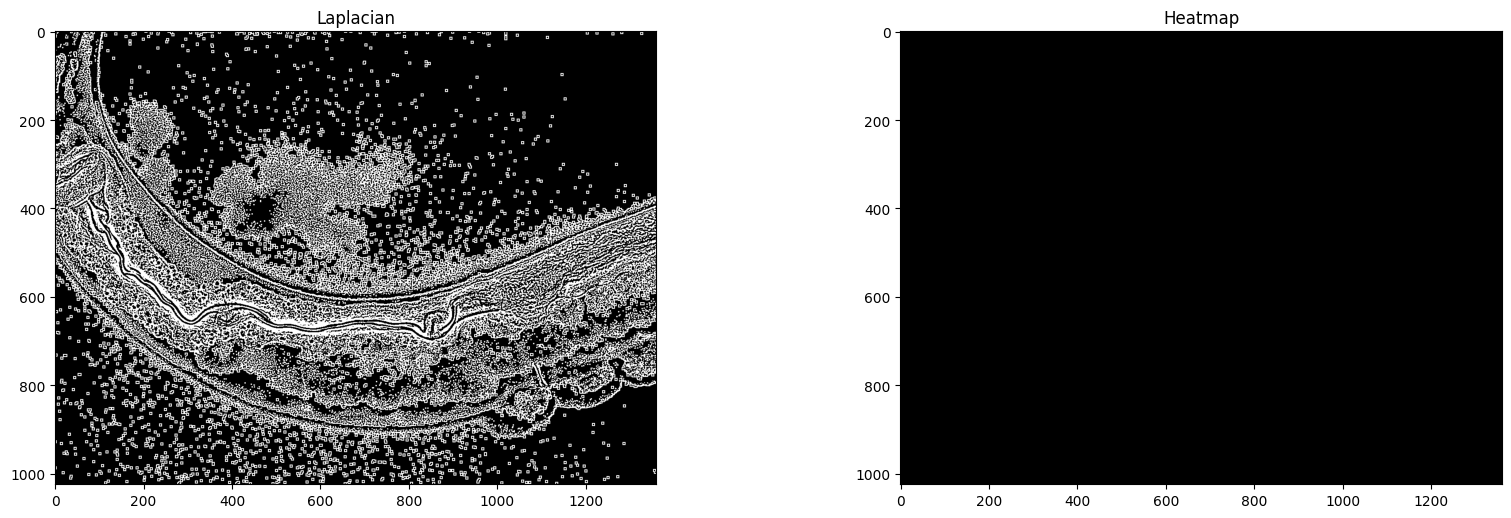

In [4]:
# Load the image and convert to grayscale
image = cv2.imread('testimages/23-01-23_APN017_RNAi_24HRS_L4440_PA14_20X_2b(1).tif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the Laplacian of the image
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize = 7)

# Calculate the variance of the Laplacian at each point
variance = np.var(laplacian)

# Threshold the variance values to create a binary mask
threshold = 0
mask = np.zeros(image.shape, dtype=np.uint8)
mask[variance < threshold] = 0

# Convert the binary mask to a color map
heatmap = cv2.applyColorMap(mask, cv2.COLORMAP_JET)

# Display the heatmap
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Laplacian")
plt.imshow(laplacian)

# Display the heatmap
plt.subplot(3, 2, 2)
plt.title("Heatmap")
plt.imshow(mask)

In [14]:
image = cv2.imread('testimages/23-01-23_APN017_RNAi_24HRS_L4440_PA14_20X_2b(1).tif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
if __name__ == '__main__':
    # img = cv2.imread('image_name', 0)
    blur_map = blur_detector.detectBlur(gray, downsampling_factor=4, num_scales=1, scale_start=2, num_iterations_RF_filter=4)
    # cv2.imshow('ori_img', image)

plt.figure(figsize=(30, 30))

plt.subplot(3, 2, 1)
plt.title("grayscale")
plt.imshow(gray)

plt.subplot(3, 2, 2)
plt.title("Blur Map")
plt.imshow(blur_map)

plt.subplot(3, 2, 3)
plt.title("Image")
plt.imshow(image)

print(blur_map.var())
plt.show()

[|                  ] 10%
[| |                ] 20%
[| | |              ] 30%
[| | | |            ] 40%
[| | | | |          ] 50%
[| | | | | |        ] 60%


KeyboardInterrupt: 

In [ ]:
# Otsu's blurring for the normal image
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Grayscale image")
plt.imshow(gray)

thres = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


plt.subplot(3, 2, 2)
plt.title("Binarised")
plt.imshow(thres)
plt.show()

In [ ]:
# Otsu's blurring for the normal image
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Grayscale image")
plt.imshow(blur_map)


# Convert the image to uint8
blur_map_uint8 = cv2.convertScaleAbs(blur_map)


# Apply Otsu's thresholding
blur_thres = cv2.threshold(blur_map_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

blur_thres_bin = cv2.threshold(blur_map_uint8, 0, 255, cv2.THRESH_BINARY)[1]
# blur_thres_bin = cv2.adaptiveThreshold(blur_map_uint8, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 3) 
# blur_thres = cv2.threshold(blur_map, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


plt.subplot(3, 2, 2)
plt.title("Otsu's Binarised")
plt.imshow(blur_thres)

plt.subplot(3, 2, 3)
plt.title("Binarised")
plt.imshow(blur_thres_bin)

plt.show()


In [ ]:
type(thres)
print(thres)

In [ ]:
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Grayscale")
plt.imshow(thres)

plt.subplot(3, 2, 2)
plt.title("Otsu's on Blur Map")
plt.imshow(blur_map_thres)

img1 = thres
img2 = blur_map_thres

diff = img1 - img2

# diff
plt.subplot(3, 2, 3)
plt.title("Difference")
plt.imshow(diff)
plt.show()


In [ ]:
plt.figure(figsize=(20, 20))

# Find Canny edges
edged = cv2.Canny(image, 30, 200)

plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)


# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.subplot(2, 2, 3)
plt.title("Canny Edges After Contouring")
plt.imshow(edged)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(image)

In [ ]:
# blur_map_thres
#

kernel = cv2.getGaussianKernel(1000, 4)


sharpen_kernel = np.array([[-1,-1,-1], 
                           [-1,30,-1], 
                           [-1,-1,-1]])
sharpen = cv2.filter2D(image, -1, sharpen_kernel)

deblurred = cv2.filter2D(gray, -1, kernel)

laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()

print(gray.var())
print(sharpen.var())

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Grayscale")
plt.imshow(gray)

plt.subplot(3, 2, 2)
plt.title("sharpened")
plt.imshow(sharpen)

plt.subplot(3, 2, 3)
plt.title("Deblurred")
plt.imshow(deblurred)

plt.show()



Contours and approximating contours

approximating contours

measuring based on conditions